# This is heart disease prediction project
we are going to predict based on data wether someone have heart disease or not.

* 1- Problem Definition
* 2- Data Collection
* 3- Evaluation (the thing we are doing is feasable or not?)
* 4- Features
* 5- Modeling
* 6- Experimentation

# Problem Definition
> Based on the given data, we are going to predict if a patient has Heart disease or not. 

# Data Collection
> We have the data and we have loaded it already.

# Evaluation
> In initial stages we need to make sure if our model gives us accuracy of 95%.

# Features
> Which features are important? Which feature means what?


age => age in years

sex => (1 = male; 0 = female)

cp => chest pain type

trestbps => resting blood pressure (in mm Hg on admission to the hospital)

chol => serum cholestoral in mg/dl

fbs => (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)

restecg => resting electrocardiographic results

thalach => maximum heart rate achieved

exang => exercise induced angina (1 = yes; 0 = no)

oldpeak => ST depression induced by exercise relative to rest

slope => the slope of the peak exercise ST segment

ca => number of major vessels (0-3) colored by flourosopy

thal => 1 = normal; 2 = fixed defect; 3 = reversable defect

target => 1 or 0 (0 = no disease and 1 = disease.)

# Tools Preparation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#import evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



# Exploring the Data intial Stage

* 1- What problem i am going to solve?
* 2- What kind of data i have?
* 3- Does this data have missing values?
* 4- Are there any outliers, sporious vectors?
* 5- Can we add or remove some the features?

In [6]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [9]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

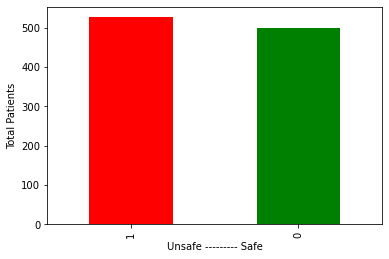

In [19]:
df['target'].value_counts().plot(kind='bar', color = ['red','green'], xlabel='Unsafe --------- Safe', ylabel= 'Total Patients');

In [22]:
df.isna().sum()  #Are there any missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

In [25]:
713/1025 # males

0.6956097560975609

In [26]:
312/1025 # females

0.304390243902439

In [28]:
# let check how many males & females are safe and unsafe

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


In [29]:
# out of 312 females, 86 are safe & 226 have heart disease
# out of 713 males, 413 are safe & 300 have heart disease

In [30]:
226/312 # %age of females having heart disease

0.7243589743589743

In [32]:
300/713 # %age of males having heart disease

0.42075736325385693

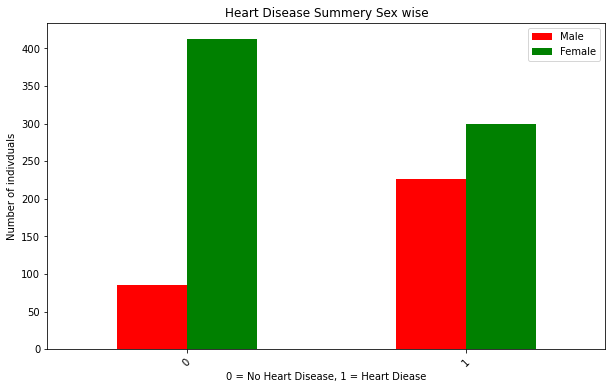

In [39]:
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    figsize=(10,6), 
                                    color = ['red', 'green'])
plt.title("Heart Disease Summery Sex wise")
plt.xlabel('0 = No Heart Disease, 1 = Heart Diease')
plt.ylabel('Number of indivduals')
plt.legend(["Male","Female"])

plt.xticks(rotation=45);

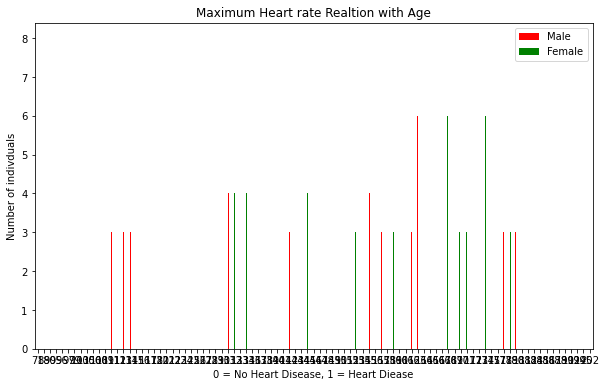

In [51]:
# now lets check the rate of change of heart_rate with age

pd.crosstab(df.thalach, df.age).plot(kind='bar', 
                                    figsize=(10,6), 
                                    color = ['red', 'green'])
plt.title("Maximum Heart rate Realtion with Age")
plt.xlabel('0 = No Heart Disease, 1 = Heart Diease')
plt.ylabel('Number of indivduals')
plt.legend(["Male","Female"])

plt.xticks(rotation=0);

In [52]:
df['thalach'].value_counts() #91 different values, so the plot choice is very important

162    35
160    31
163    29
173    28
152    28
       ..
194     3
185     3
106     3
88      3
113     3
Name: thalach, Length: 91, dtype: int64

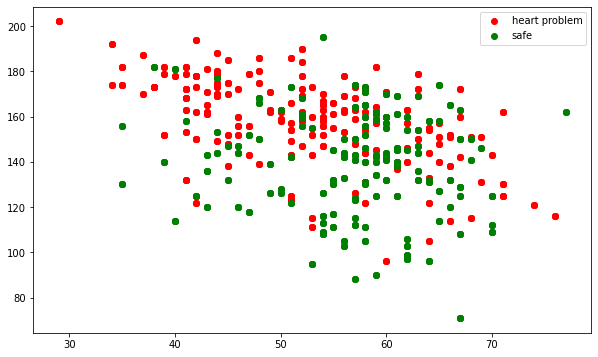

In [59]:
# Finding Patterns in data using Scatter Plot

plt.figure(figsize=(10,6))
#create Scatter plot
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], c='red'); # those who have Heart disease
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], c='green'); # those who have Heart disease

plt.legend(['heart problem','safe']);

Q: Is there any relation between age and heart disease?
>Ans: the normal Histagram is towards center but we can see that the following Histogram is skewed towards higher age values
     it means that Aged people have more heart disease than the youngers

<AxesSubplot:ylabel='Frequency'>

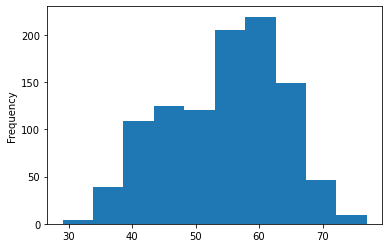

In [60]:
#Create Histogram to see age Distribution

df.age.plot.hist()

In [65]:
# the histogram shows that how much your data diviates from perfect distribution
# also it shows outliers if there is a high bar on the sides

In [67]:
df.cp.value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

cp: chest pain type
*        -- Value 0: typical angina : (Chest pain due to decrease in blood pressure)
*        -- Value 1: atypical angina : (Chest pain not related to Heart disease)
*        -- Value 2: non-anginal pain : (Not Heart related)
*        -- Value 3: asymptomatic : (Chest pain not showing Heart Problem)

In [69]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


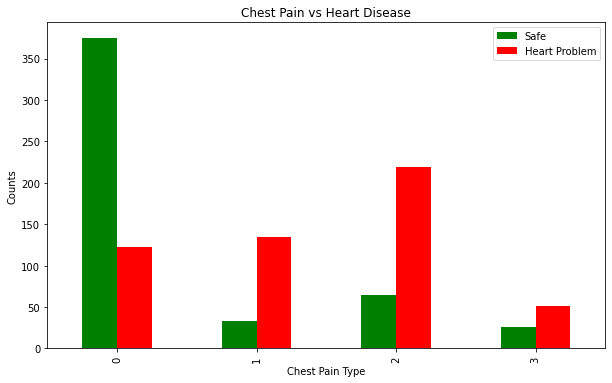

In [75]:
#make the bar chart of Chest Pain vs Target
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color = ['green','red'])

#make some description of the chart
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['Safe', 'Heart Problem']);

In [79]:
# from the figure we can see that Chest Pain types (1,2) has more Heart disease
# -- Value 1: atypical angina : (Chest pain not related to Heart disease)
# -- Value 2: non-anginal pain : (Not Heart related)

# Correlation Matrix

In [80]:
# shows the relation between aall the matrices

In [81]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [82]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


In [85]:
# Positive Correlation
# Negative Correlation
# Maximum Correlation (with itself) -> (Diagonal)

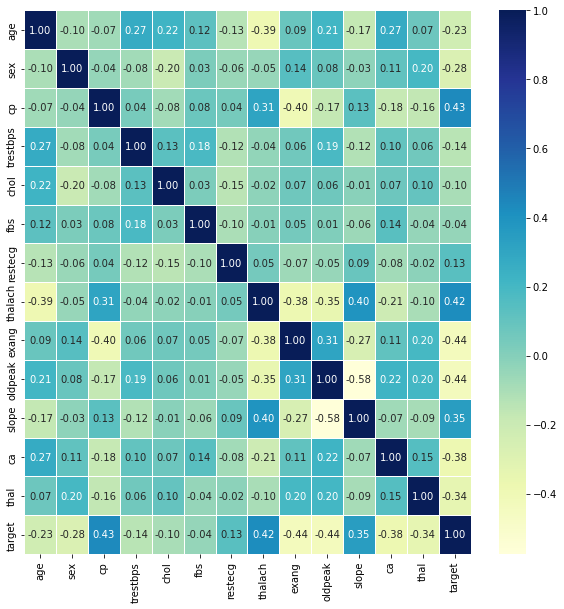

In [87]:
# Lets draw Correlation map
cor_map = df.corr()
home, room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt='0.2f',
                  cmap="YlGnBu");

In [88]:
# As we can see the cp has (0.42) correlation with target. which means as the cp value increase, the target is also inceased

# 1) Problem Definition
    we have a Data and we need to predict heart disease or no heart disease

# 2) Evaluation
    we need 95% accuracy.

# 3) Modeling

In [92]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [93]:
#split data into train and test 

X = df.drop('target', axis=1)
Y = df['target']

In [108]:
# Using Random seed, so that others could produce the same results
np.random.seed(7)

#split into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25)

In [96]:
len(x_train)

768

# Choosing the Right Model

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

#### The Models we are going to use

`1. K-Nearest Neighbors Classifier` -------------> from classification

`2. RandomForestClassifier` ------------------------> from ensemble

`3. LogisticRegression` -----------------------------> from linear models (regression)

In [100]:
#putting the models into a dictionary

models = {
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression()
}

In [106]:
def fit_and_score(models, x_train, x_test, y_train, y_test):
    
    np.random.seed(7)
    
    # make a dictionary to score the model
    model_score = {}
    
    # looping through
    for name,model in models.items():
        
        #fit the model
        model.fit(x_train,y_train)

        # evaluate the model and append its score
        model_score[name] = model.score(x_test,y_test)
        
    return model_score
    

In [111]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.7431906614785992,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8599221789883269}

In [112]:
model_compare = pd.DataFrame(model_scores,index=['Accuracy'])

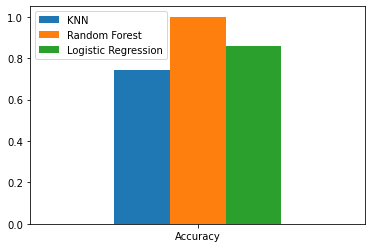

In [120]:
model_compare.plot.bar()
plt.xticks(rotation=0);

# Improving and Tuning the model
#### Universal method used for all classification problems
  * Hyperparameter tuning
  * Features improving
  
#### Advance Level
  * Confusion matrix
  * Cross Validation
  * Precision
  * Recall
  * f1
  * Classification Report
  * Area under the Cruve (ROC curve)
    

# 1) Tuning KNN

In [126]:
KNN = KNeighborsClassifier()
KNN.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [130]:
train_score = []
test_score = []

#create range to be test for n_neighbors
neighbors = range(1,20)
# KNN inststance
KNN = KNeighborsClassifier()
#looping through the range
for i in neighbors:
    KNN.set_params(n_neighbors= i)
    #run the fit for i'th value
    KNN.fit(x_train,y_train)
    #updating the train score list
    train_score.append(KNN.score(x_train,y_train))
    #updating the test score list
    test_score.append(KNN.score(x_test,y_test))
    

In [131]:
train_score

[1.0,
 0.9934895833333334,
 0.9856770833333334,
 0.9270833333333334,
 0.9010416666666666,
 0.8190104166666666,
 0.7864583333333334,
 0.78515625,
 0.76953125,
 0.7721354166666666,
 0.7591145833333334,
 0.7473958333333334,
 0.7604166666666666,
 0.7591145833333334,
 0.7552083333333334,
 0.76953125,
 0.75,
 0.7395833333333334,
 0.7447916666666666]

In [132]:
test_score

[0.9844357976653697,
 0.933852140077821,
 0.9027237354085603,
 0.8015564202334631,
 0.7431906614785992,
 0.7392996108949417,
 0.7470817120622568,
 0.7431906614785992,
 0.7509727626459144,
 0.7431906614785992,
 0.7120622568093385,
 0.7237354085603113,
 0.7392996108949417,
 0.7509727626459144,
 0.7431906614785992,
 0.7315175097276264,
 0.7392996108949417,
 0.7198443579766537,
 0.708171206225681]

# Plotting the Accuracy Scores of KNN

Max KNN score: 98.44%


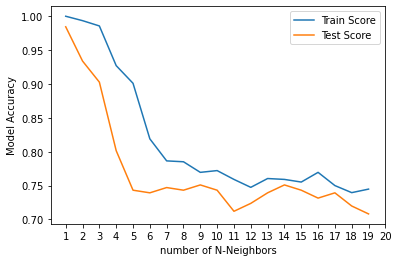

In [143]:
plt.plot(neighbors,train_score, label = 'Train Score')
plt.plot(neighbors,test_score, label = 'Test Score')
plt.xticks(np.arange(1,21,1));
plt.xlabel("number of N-Neighbors")
plt.ylabel("Model Accuracy")
plt.legend();

print(f"Max KNN score: {max(test_score)*100:0.2f}%" )

In [203]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
KNN.score(x_test,y_test)

0.9844357976653697

In [144]:
# wow we crossed our required 95% accuracy

# Hyperparameters Tuning Using Randomized Search CV

* `LogisticRegression()`
* `RandomForestClassifier()`

In [145]:
logistic = LogisticRegression()

In [148]:
logistic.fit(x_train,y_train)
logistic.get_params()

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [149]:
# we are going to use (C,solver) parameters of logistic Regression

In [150]:
np.logspace(-4,4,20) 

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [187]:
LogisticRegression_params = {
    "C" : np.logspace(-4,4,20),
    "solver": ['liblinear','saga']          # “lbfgs”, “liblinear”, “newton-cg”, “newton-cholesky”, “sag” and “saga”:
}

RandomForest_params = {
    'n_estimators' : np.arange(10,1600,100), #10 to 1600 with jump of 100
    'max_depth' : [None,3,5,6,10],
    'min_samples_split' : np.arange(2,20,2),
    'min_samples_leaf' : np.arange(1,20,2),
}

#range() only works with integers, while arange() works with both integers and floats.



# 2) Tuning Logistic Regression

In [195]:
np.random.seed(7)

#lets use RSCV to tune hyperparameter

lr = RandomizedSearchCV(LogisticRegression(), 
                        param_distributions = LogisticRegression_params, 
                        cv = 5, # tests sets from 5 different parts
                        n_iter = 20, #20 random combinations of hyperparams
                        verbose=True)

# fit the random hyperparams search model for logistic regression
lr.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear', 'saga']},
                   verbose=True)

In [196]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [197]:
lr.score(x_test,y_test)

0.8715953307392996

In [178]:
# no big improvements, it is almost the same as fitting the lr model without tuning hyperparams
# as we used only 2 hyperparameters

# 2) Tuning  RandomForestClassifier

In [186]:
np.random.seed(7)

#lets use RSCV to tune hyperparameter

rfc = RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions = RandomForest_params, 
                        cv = 5, # tests sets from 5 different parts
                        n_iter = 20, #20 random combinations of hyperparams
                        verbose=2)

# fit the random hyperparams search model for logistic regression
rfc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=1510; total time=   3.1s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=1510; total time=   2.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=1510; total time=   2.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=1510; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=12, n_estimators=1510; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=17, min_samples_split=10, n_estimators=410; total time=   0.6s
[CV

[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   2.0s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   2.4s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   2.6s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   2.5s
[CV] END max_depth=6, min_samples_leaf=9, min_samples_split=14, n_estimators=810; total time=   2.9s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total time=   1.7s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=710; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=2)

In [191]:
rfc.best_params_

{'n_estimators': 910,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 6}

In [193]:
rfc.score(x_test,y_test)

0.9260700389105059

_____________

# `Original Accuracy` vs `After Tuning Accuracy`

Original
* `KNN`: 0.7431906614785992
* `Random Forest`: 1.0
* `Logistic Regression`: 0.8599221789883269

After Tuning
* `KNN`: 0.9844357976653697
* `Random Forest`: 0.9260700389105059
* `Logistic Regression`: 0.8715953307392996


_____________

    1) By Hand Hyperparameter Tuning: (Done)
    2) Randomized Search CV: (Done)
    3) Grid Search CV: (Lets try this one)

_____________

# Hyperparameters Tuning Using Grid Search CV

In [216]:
np.random.seed(7)

#lets use RSCV to tune hyperparameter

lr_gs = GridSearchCV(LogisticRegression(), 
                        param_grid = LogisticRegression_params, 
                        cv = 5, # tests sets from 5 different parts
                        verbose=False)

# fit the grid search model for logistic regression
lr_gs.fit(x_train,y_train)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear', 'saga']},
             verbose=False)

In [217]:
lr_gs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [218]:
lr_gs.score(x_test,y_test)

0.8287937743190662

In [226]:
np.random.seed(7)

#param grid
RandomForest_params = {
    'n_estimators' : np.arange(10,101,50), #10 to 1600 with jump of 100
    'max_depth' : [None,3,50],
    'min_samples_split' : np.arange(2,8,2),
    'min_samples_leaf' : np.arange(1,7,2),
}

#lets use RSCV to tune hyperparameter

rfc_gs = GridSearchCV(RandomForestClassifier(n_jobs=1),
                        param_grid = RandomForest_params, 
                        cv = 5, # tests sets from 5 different parts
                        verbose=2)

# fit the grid hyperparams search model for logistic regression
rfc_gs.fit(x_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   0.0s
[CV] END max_depth=N

[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   

[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=5, min_samples_split=6, n_estimators=60; total time=   0.0s
[CV] END m

[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=4, n_estimators=60; total time=   0.1s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, min_samples_leaf=5, min_samples_split=6, n_estimators=10; total time=   0.0s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None, 3, 50],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([2, 4, 6]),
                         'n_estimators': array([10, 60])},
             verbose=2)

In [227]:
rfc_gs.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 60}

In [229]:
rfc_gs.score(x_test,y_test)

1.0

# Improving and Tuning the model
#### Universal method used for all classification problems
  * Hyperparameter tuning ---- (done)
  * Features improving ----(not touched yet)
  
#### Advance Level
  * Area under the Cruve (ROC curve)
  * Confusion matrix
  * Cross Validation
  * Precision
  * Recall
  * f1
  * Classification Report
  
    

## 1) plotting area under the curve

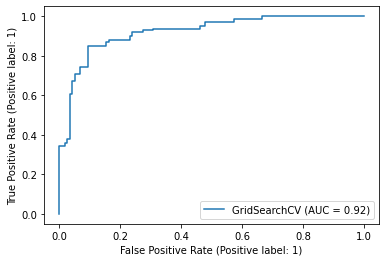

In [237]:
y_preds = lr_gs.predict(x_test)    #to plot roc_curve we first have to run predict
plot_roc_curve(lr_gs,x_test,y_test)

## 2) Confusion matrix


In [239]:
confusion_matrix(y_test,y_preds)

array([[ 90,  27],
       [ 17, 123]], dtype=int64)

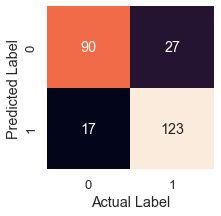

In [250]:
sns.set(font_scale=1.2)

def plot_conf_matrix(y_test,y_preds):
    
    "This will plot Confusion matrix"
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    fmt = "",
                    cbar = False)
    plt.xlabel('Actual Label')
    plt.ylabel('Predicted Label')
    
plot_conf_matrix(y_test,y_preds)

In [251]:
# 27 false Negaitvie
# 17 False Positive

## 3) Classification Report

In [252]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80       117
           1       0.82      0.88      0.85       140

    accuracy                           0.83       257
   macro avg       0.83      0.82      0.83       257
weighted avg       0.83      0.83      0.83       257



In [253]:
# Precision: How much correctly your model inditifies actual values in the problem

In [255]:
# Recall: 1 recall means supposing we have only the less_occured labels of class imbalance => Precison = low
# because we have considered the more_occured labels also as less_occured.

# example we want to find salt in flour. if we consider all the data as salt then => precision = low
# because we have wrongly labled the flour also as a salt

In [257]:
# Recall and precision are inversly proportional (negatively corelated)

In [262]:
# f1-score: combination of precision and recall. we have maximize its value

In [263]:
# support: 117,140 tells us that we have almost same amount of labels, there is no class imbalance
# if suppurt was like 4,140 then then we would have class imbalance

In [264]:
# accuracy: is the the classical accuracy of the model                          

In [265]:
#macro avg: does not counts class imbalance

In [261]:
#weighted avg: add weight to less_occured class to reduce class imbalance

# Cross Validation

In [266]:
# the above classification report was for just single test set

In [267]:
# now we shuffle of test data and check the reults

In [268]:
lr_gs.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [271]:
lr = LogisticRegression(C= 0.08858667904100823,
                        solver = 'liblinear')

In [272]:
#Cross Validated Accuracy

cv_accuracy = cross_val_score(lr,
                              X,
                              Y, 
                              cv=7, 
                              scoring='accuracy') #it has manyy parameters

np.mean(cv_accuracy)

0.8419132819468296

In [273]:
# our previous accuracy was 83% in classification report

In [274]:
#Cross Validated Precision

cv_precision = cross_val_score(lr,
                              X,
                              Y, 
                              cv=7, 
                              scoring='precision') #it has manyy parameters

np.mean(cv_precision)

0.8054274459339954

In [275]:
#Cross Validated recall

cv_recall = cross_val_score(lr,
                              X,
                              Y, 
                              cv=7, 
                              scoring='recall')

np.mean(cv_recall)

0.912531328320802

In [276]:
#Cross Validated f1

cv_f1 = cross_val_score(lr,
                              X,
                              Y, 
                              cv=7, 
                              scoring='f1')

np.mean(cv_f1)

0.8554497800940732

In [281]:
acc = np.mean(cv_accuracy)
pre = np.mean(cv_precision)
rec = np.mean(cv_recall)
f1 = np.mean(cv_f1)

# Visualizing the Cross Validated Metrices

In [282]:
cv_plot = pd.DataFrame({
    "Accuracy":acc,
    "Precision":pre,
    "Recall":rec,
    "F1":f1
},index=[0])

<AxesSubplot:title={'center':'Comparison of the Metrices'}>

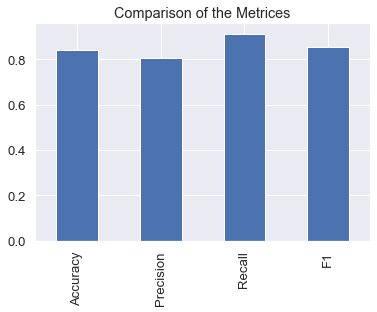

In [285]:
cv_plot.T.plot.bar(title = "Comparison of the Metrices",
                legend=False)

# Features improving

In [286]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [287]:
# now we will find those attributes which greatly affects our target

In [289]:
# Check coefficient

lr.fit(x_train,y_train)
lr.coef_

array([[ 0.00415002, -1.09597188,  0.71385466, -0.01359613, -0.00444998,
        -0.11492685,  0.35727104,  0.03045434, -0.56920156, -0.4813965 ,
         0.36593504, -0.60162349, -0.66709405]])

In [290]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': 0.004150018091398386,
 'sex': -1.0959718813324426,
 'cp': 0.7138546593254852,
 'trestbps': -0.01359612610379619,
 'chol': -0.004449982453540935,
 'fbs': -0.11492685401496247,
 'restecg': 0.3572710393077602,
 'thalach': 0.030454340674334855,
 'exang': -0.5692015625575012,
 'oldpeak': -0.48139650416582813,
 'slope': 0.3659350398248929,
 'ca': -0.6016234912749009,
 'thal': -0.6670940511685863}

<AxesSubplot:title={'center':'Features Importance'}>

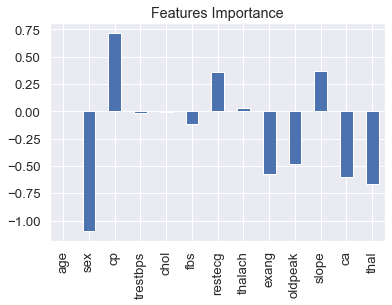

In [291]:
features = pd.DataFrame(final_coef,index=[0])
features.T.plot.bar(title= 'Features Importance', legend=False)

# Conclusion

>We got out 95% accuracy.
    
>but what if we have less than 95% accuracy?

    We can ask some Questions
        * What if we try to get more data
        * What if we try to improve the Quality of the Data
        * What if we try to use other models & see if there is any improvements

    